In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

from pandas import read_csv, DataFrame
import pandas as pd
import sys
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import numpy as np

plt.style.use('seaborn')

In [35]:
# Get the CSV data here and print head
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [36]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [37]:
df.shape

(8425, 23)

In [38]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

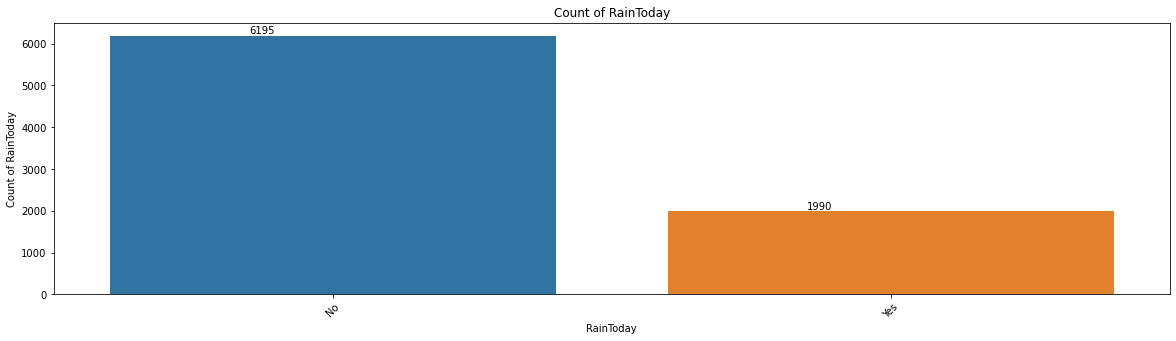

In [39]:
#count of rain today
plt.figure(figsize = (20,5))
plt.title('Count of RainToday')
ax=sns.countplot(x = 'RainToday', data=df)
plt.xlabel('RainToday')
plt.ylabel('Count of RainToday')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
    #There is an imbalance in the data as vales are missing

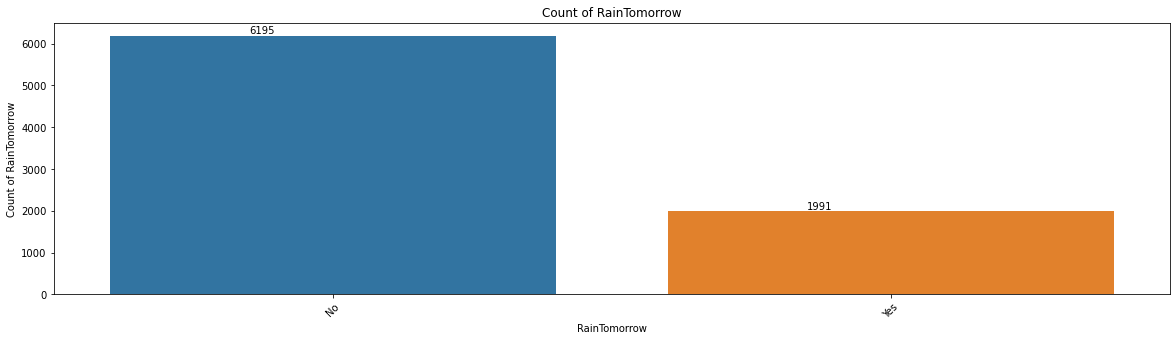

In [40]:
#count of rain tommorow
plt.figure(figsize = (20,5))
plt.title('Count of RainTomorrow')
ax=sns.countplot(x = 'RainTomorrow', data=df)
plt.xlabel('RainTomorrow')
plt.ylabel('Count of RainTomorrow')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
    #There is an imbalance in the data

In [46]:
# changeing into 0 and 1 of raintoday and raintomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

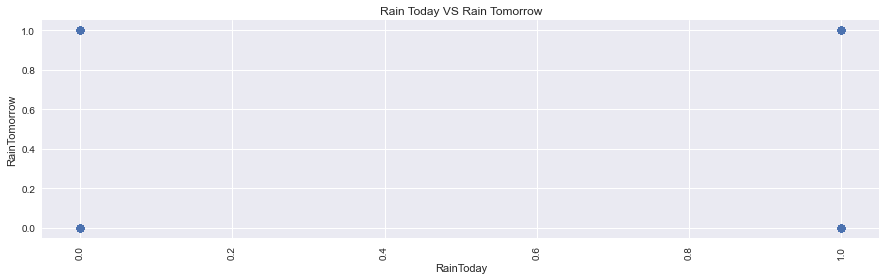

In [47]:
#Rain Today VS Rain Tomorrow
plt.figure(figsize = (15,4))
plt.title('Rain Today VS Rain Tomorrow')
plt.scatter(df['RainToday'], df['RainTomorrow'])
plt.xticks
plt.xlabel('RainToday')
plt.ylabel('RainTomorrow')
plt.xticks(rotation = 90)

In [ ]:
#checking for the data in date
import seaborn as sns #checking for null
#count of rain tommorow
plt.figure(figsize = (20,5))
plt.title('Count of Date')
ax=sns.countplot(x = 'Date', data=df)
plt.xlabel('Date')
plt.ylabel('Count of Date')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

<AxesSubplot:>

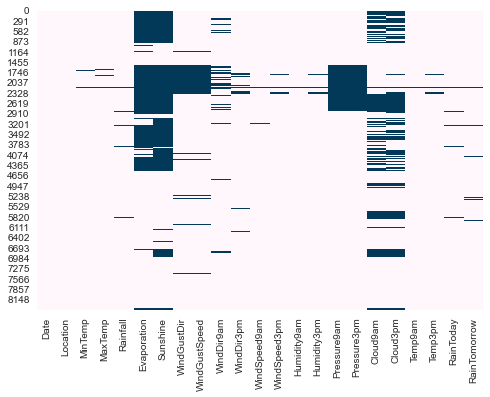

In [50]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [ ]:
#evaporation, sunshine, , pressure3am, cloud9am have high missign data

In [51]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,3994,0.474065
Evaporation,3512,0.416855
Cloud3pm,2455,0.291395
Cloud9am,2421,0.287359


In [ ]:
#this shows that more than slightly less than 50% of the data is missing, 
#we cannot remove the missing columns with remove dulicates function

In [55]:
df.select_dtypes(include=['float']).columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [56]:
df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [61]:
#checking for the missing data in date
df.Date.value_counts()

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


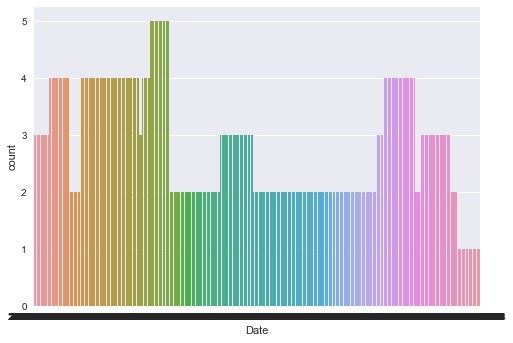

In [84]:
#checking for the missing data in location
import seaborn as sns  
location=sns.countplot(x="Date", data=df)
print(df["Date"].value_counts())

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


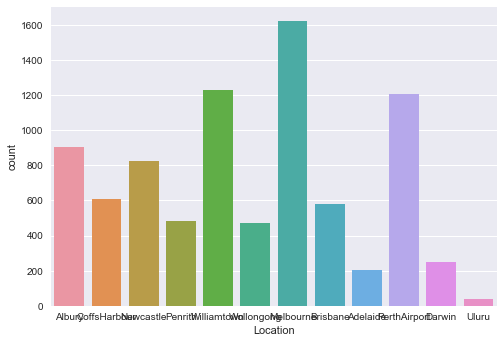

In [60]:
#checking for the missing data in location
import seaborn as sns  
location=sns.countplot(x="Location", data=df)
print(df["Location"].value_counts())

In [62]:
#we shall be dropping the date column
#Date and location dont have missing values

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [63]:
#checking for missing values or nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


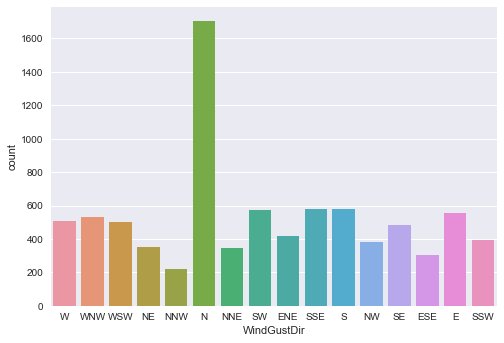

In [64]:
#checking fr missing values
import seaborn as sns  
location=sns.countplot(x="WindGustDir", data=df)
print(df["WindGustDir"].value_counts())

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


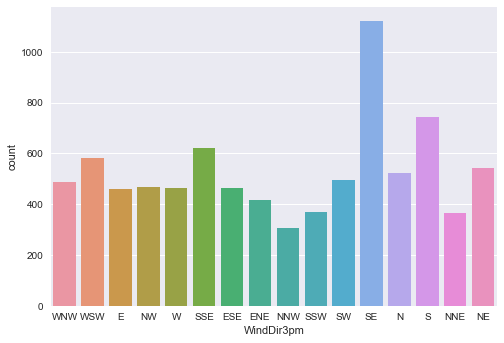

In [65]:
#checking fr missing values
import seaborn as sns  
location=sns.countplot(x="WindDir3pm", data=df)
print(df["WindDir3pm"].value_counts())

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


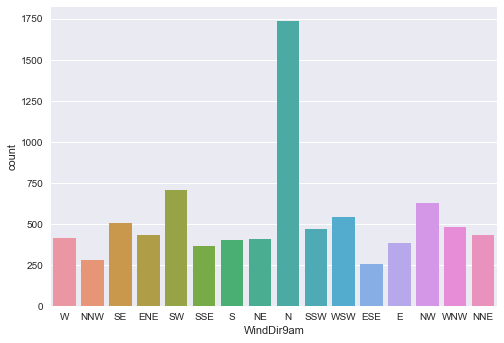

In [66]:
#checking fr missing values
import seaborn as sns  
location=sns.countplot(x="WindDir9am", data=df)
print(df["WindDir9am"].value_counts())

In [ ]:
#call data in the float columns has nulls
#MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm
#Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow 

In [67]:
#filling mean values
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())


In [68]:
#RainToday and RainTomorrow are alreday converted to 0 and 1 values (no -0 and Yes-1)
#we shall be using moe method to fill blank data
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [69]:
#checking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [70]:
#we have no nulls
def pplot(df,i):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()

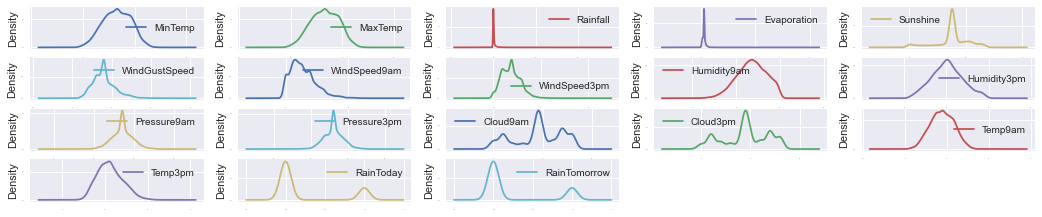

In [71]:
df.plot(kind='density', subplots=True, layout=(13, 5), sharex=False, legend=True, fontsize=1, figsize=(18,12))
plt.show()

In [ ]:
#there is sligh skewness in the continous columns

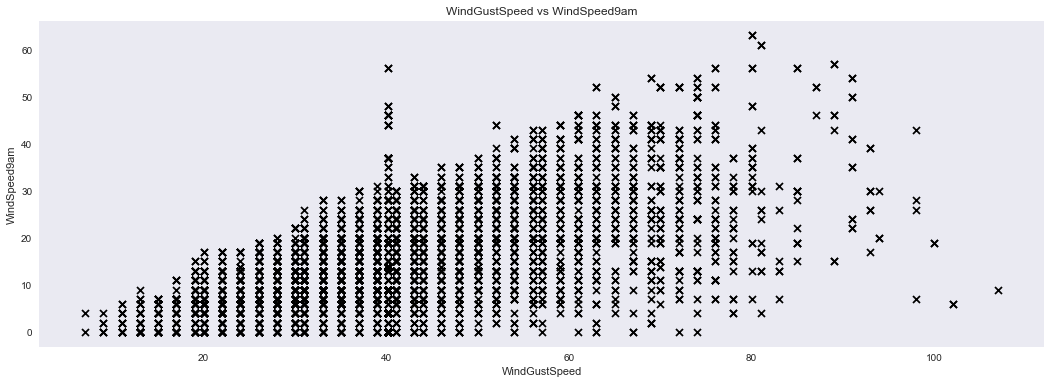

In [72]:
plt.figure(figsize=(18, 6))
plt.title("WindGustSpeed vs WindSpeed9am")

plt.grid()
plt.scatter(df['WindGustSpeed'] , df['WindSpeed9am'], c='k', marker='x')
plt.xlabel("WindGustSpeed")
plt.ylabel("WindSpeed9am")
plt.show()
#there is a relation between WindGustSpeed and WindSpeed9am

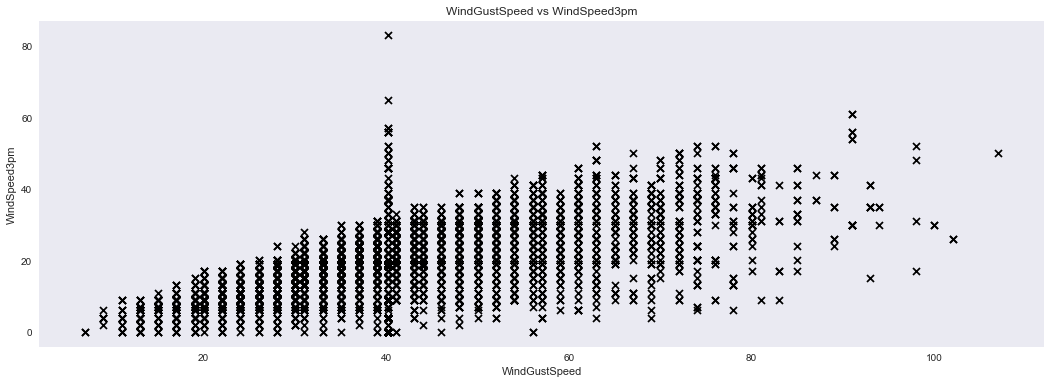

In [73]:
plt.figure(figsize=(18, 6))
plt.title("WindGustSpeed vs WindSpeed3pm")

plt.grid()
plt.scatter(df['WindGustSpeed'] , df['WindSpeed3pm'], c='k', marker='x')
plt.xlabel("WindGustSpeed")
plt.ylabel("WindSpeed3pm")
plt.show()
#there is a relation between WindGustSpeed and WindSpeed3pm

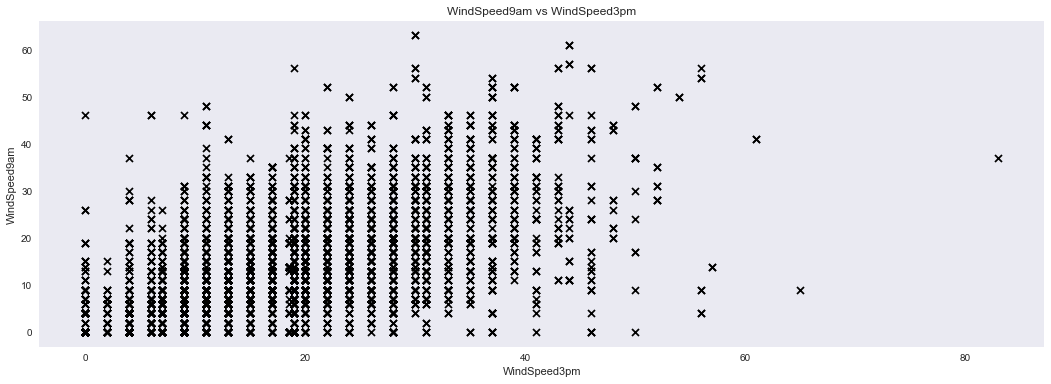

In [76]:
plt.figure(figsize=(18, 6))
plt.title("WindSpeed9am vs WindSpeed3pm")

plt.grid()
plt.scatter(df['WindSpeed3pm'] , df['WindSpeed9am'], c='k', marker='x')
plt.xlabel("WindSpeed3pm")
plt.ylabel("WindSpeed9am")
plt.show()
#there is a relation between WindSpeed9am and WindSpeed3pm

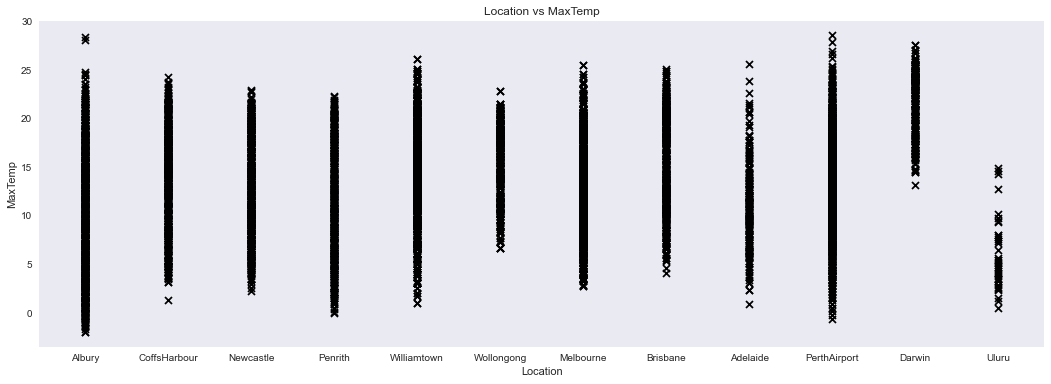

In [74]:
plt.figure(figsize=(18, 6))
plt.title("Location vs MaxTemp")

plt.grid()
plt.scatter(df['Location'] , df['MaxTemp'], c='k', marker='x')
plt.xlabel("Location")
plt.ylabel("MaxTemp")
plt.show()
#perth Airport and Albury have max temp

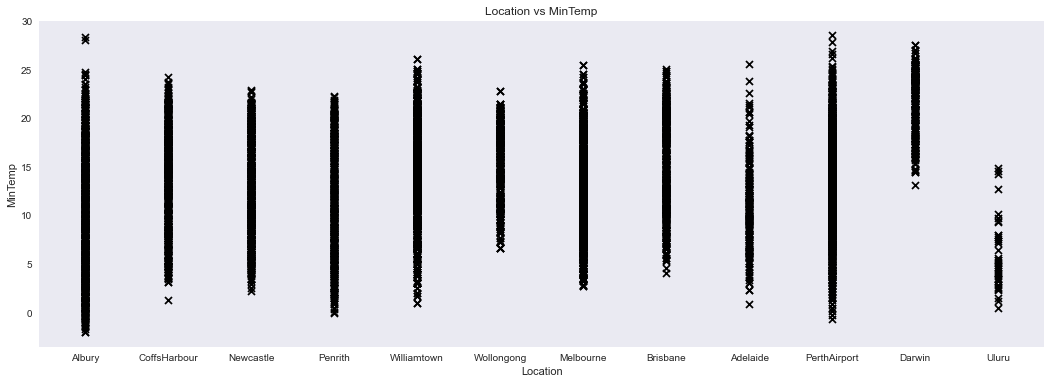

In [75]:
plt.figure(figsize=(18, 6))
plt.title("Location vs MinTemp")

plt.grid()
plt.scatter(df['Location'] , df['MinTemp'], c='k', marker='x')
plt.xlabel("Location")
plt.ylabel("MinTemp")
plt.show()
#The min temp is in  Uluru

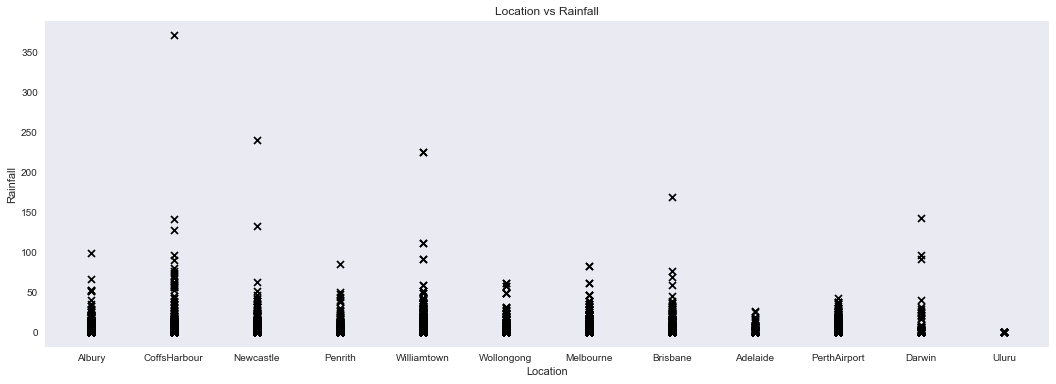

In [77]:
plt.figure(figsize=(18, 6))
plt.title("Location vs Rainfall")

plt.grid()
plt.scatter(df['Location'] , df['Rainfall'], c='k', marker='x')
plt.xlabel("Location")
plt.ylabel("Rainfall")
plt.show()
#CoffsHarbour has the highest rainfall and lowest in Uluru

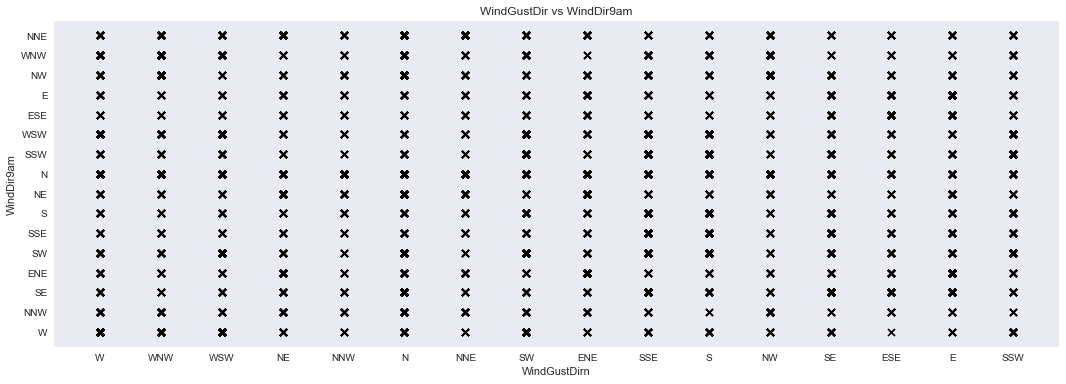

In [78]:
plt.figure(figsize=(18, 6))
plt.title("WindGustDir vs WindDir9am")

plt.grid()
plt.scatter(df['WindGustDir'] , df['WindDir9am'], c='k', marker='x')
plt.xlabel("WindGustDirn")
plt.ylabel("WindDir9am")
plt.show()

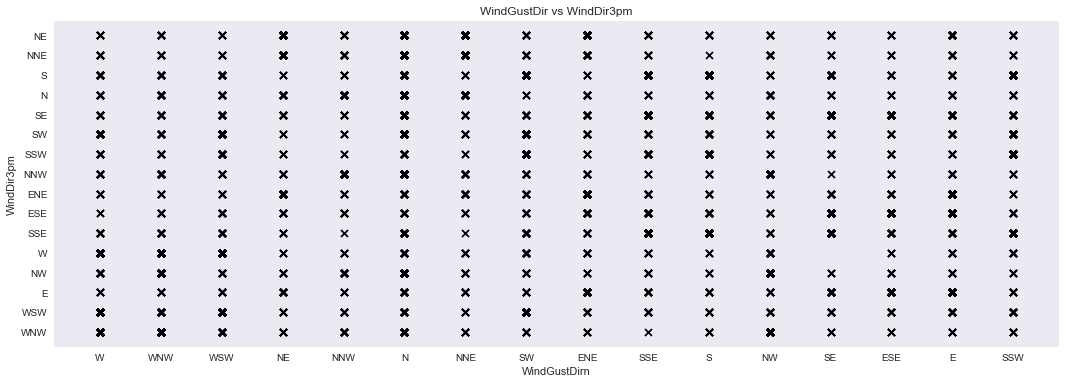

In [80]:
plt.figure(figsize=(18, 6))
plt.title("WindGustDir vs WindDir3pm")

plt.grid()
plt.scatter(df['WindGustDir'] , df['WindDir3pm'], c='k', marker='x')
plt.xlabel("WindGustDirn")
plt.ylabel("WindDir3pm")
plt.show()

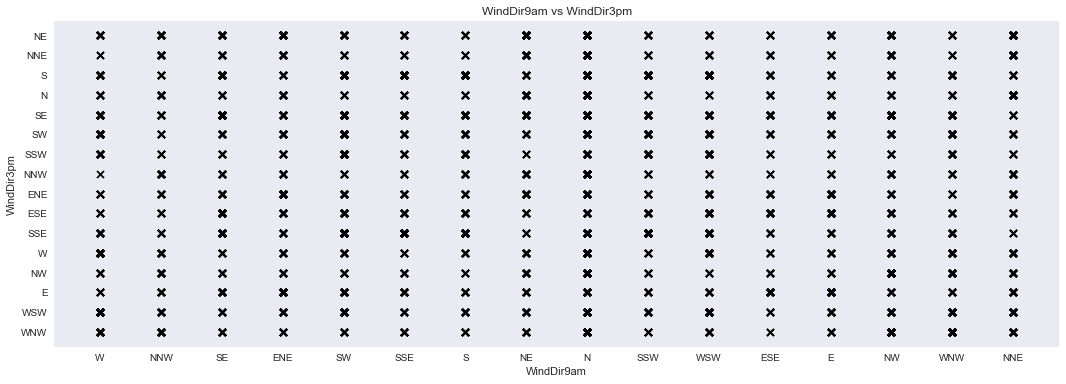

In [81]:
plt.figure(figsize=(18, 6))
plt.title("WindDir9am vs WindDir3pm")

plt.grid()
plt.scatter(df['WindDir9am'] , df['WindDir3pm'], c='k', marker='x')
plt.xlabel("WindDir9am")
plt.ylabel("WindDir3pm")
plt.show()

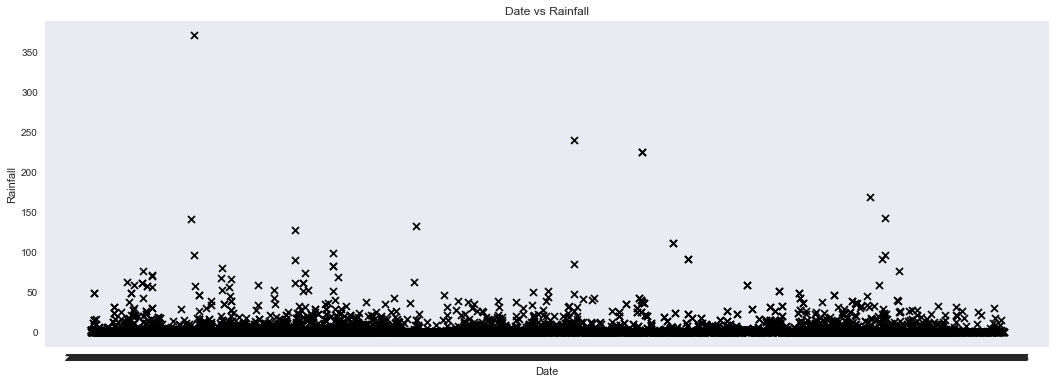

In [83]:
plt.figure(figsize=(18, 6))
plt.title("Date vs Rainfall")
plt.grid()
plt.scatter(df['Date'] , df['Rainfall'], c='k', marker='x')
plt.xlabel("Date")
plt.ylabel("Rainfall")
plt.show()
#most dates have below 50 rainfall, (most dates are in month of January and May

In [85]:
#label ensoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [86]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,13.4,0.6,5.389395,7.632205,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,1,1,7.4,7.4,0.0,5.389395,7.632205,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,2,1,12.9,12.9,0.0,5.389395,7.632205,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,3,1,9.2,9.2,0.0,5.389395,7.632205,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,4,1,17.5,17.5,1.0,5.389395,7.632205,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [87]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2999,9,2.8,2.8,0.0,5.389395,7.632205,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
8421,3000,9,3.6,3.6,0.0,5.389395,7.632205,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
8422,3001,9,5.4,5.4,0.0,5.389395,7.632205,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
8423,3002,9,7.8,7.8,0.0,5.389395,7.632205,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0
8424,3003,9,14.9,14.9,0.0,5.389395,7.632205,3,40.174469,2,...,62.0,36.0,1020.2,1017.9,8.000000,8.000000,15.0,20.9,0.0,0.0


In [88]:
#removing date column
df=df.drop(['Date'],axis=1)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<AxesSubplot:>

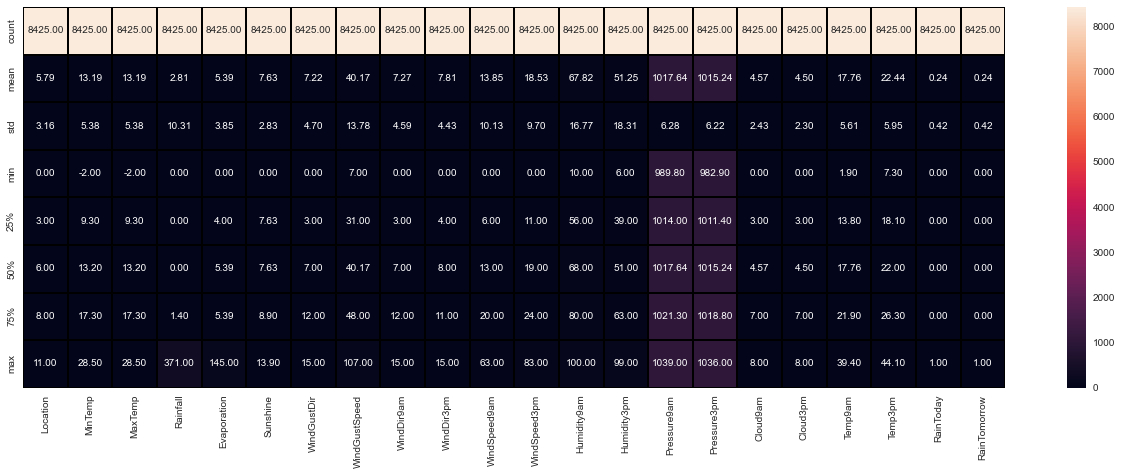

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<AxesSubplot:>

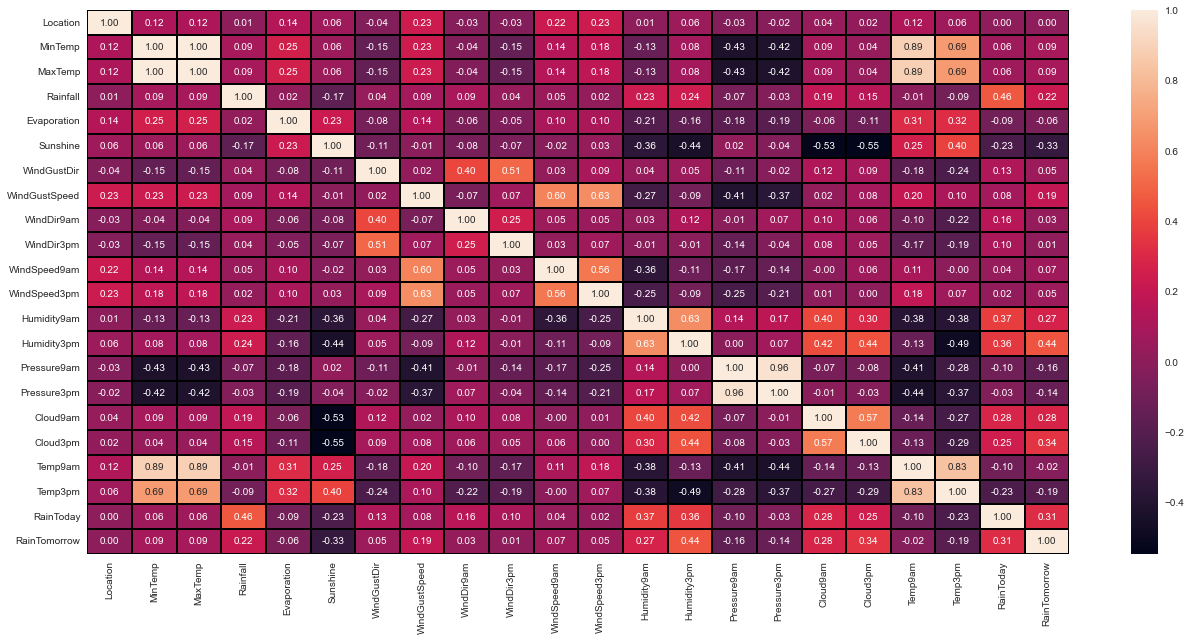

In [90]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [ ]:
#there is a correlation between temp9am and MinTemp
#there is a correlation between temp9am and MaxTemp
#there is a correlation between temp9am and temp3pm
#there is a correlation between Humdity3pm and Humidity9pm 
#there is a correlation between temp3pm and MinTemp
#there is a correlation between temp3pm and MaxTemp
#there is correlation , between WindGustSpeed' and WindSpeed9am(already drawn above)
#there is correlation , between WindGustSpeed' and 'WindSpeed3pm(already drawn above)

(array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

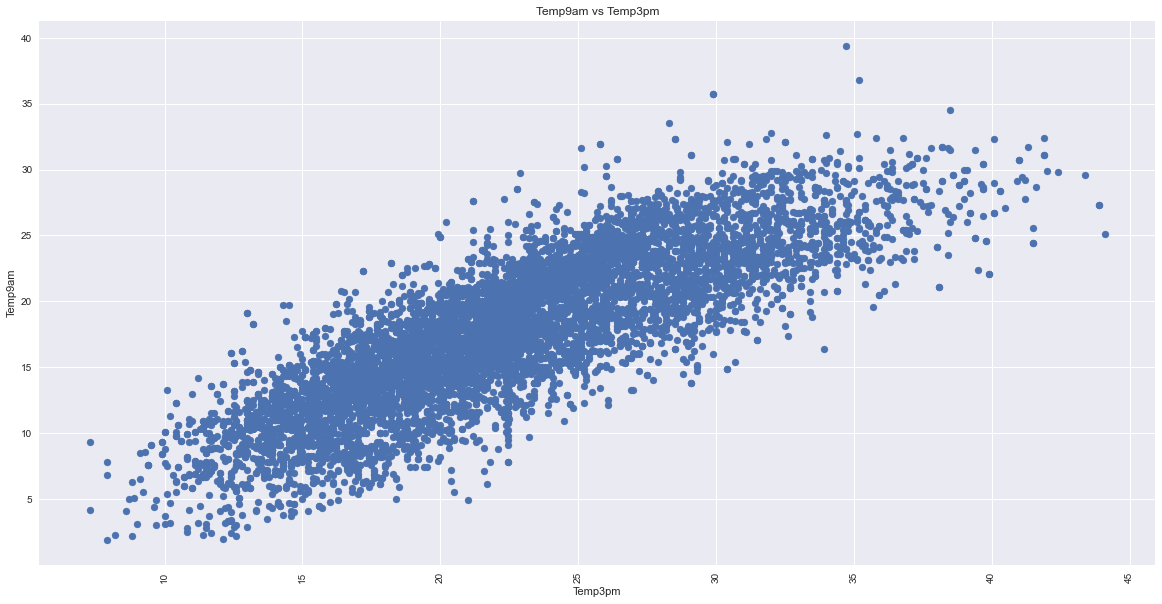

In [93]:
#'Temp9am' and 'Temp3pm',
plt.figure(figsize = (20,10))
plt.title('Temp9am vs Temp3pm')
plt.scatter(df['Temp3pm'], df['Temp9am'])
plt.xticks
plt.xlabel('Temp3pm')
plt.ylabel('Temp9am')
plt.xticks(rotation = 90)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

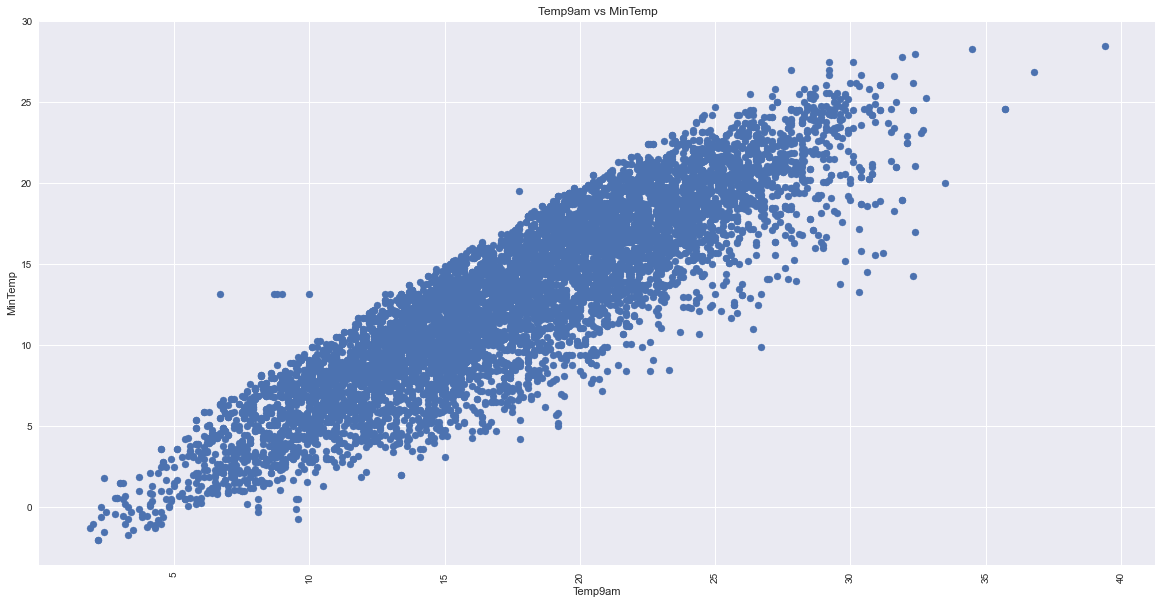

In [95]:
#'Temp9am' and 'MinTemp', 
plt.figure(figsize = (20,10))
plt.title('Temp9am vs MinTemp')
plt.scatter(df['Temp9am'], df['MinTemp'])
plt.xticks
plt.xlabel('Temp9am')
plt.ylabel('MinTemp')
plt.xticks(rotation = 90)
#minium temp at 9 am is 2 degree celcius as compared to the min temp  0 degree

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

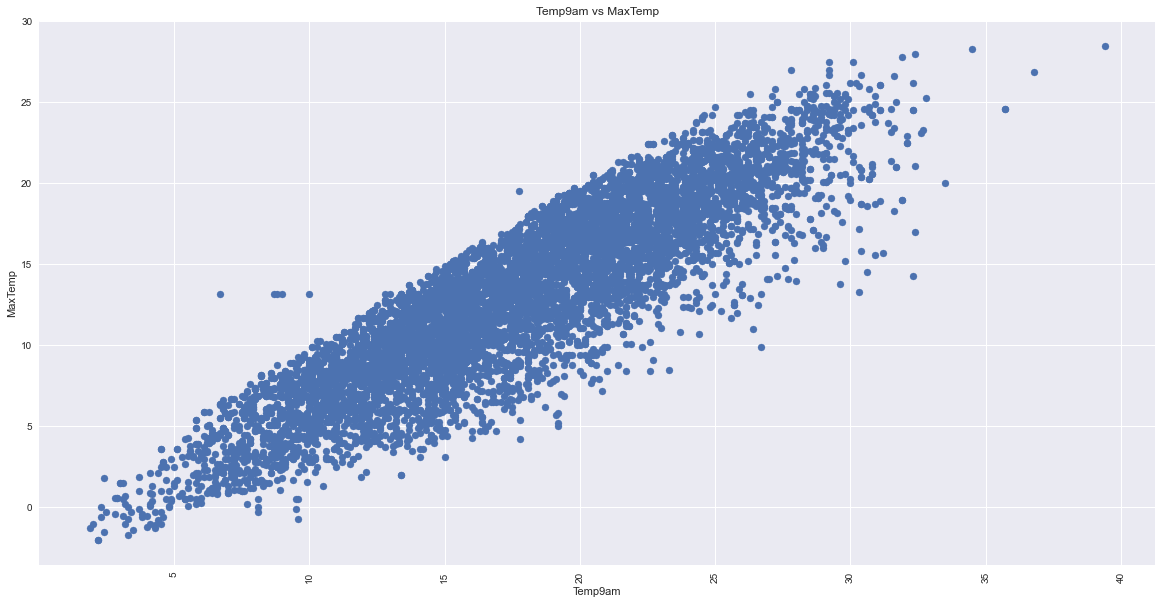

In [96]:
#'Temp9am'and 'MaxTemp'
 
plt.figure(figsize = (20,10))
plt.title('Temp9am vs MaxTemp')
plt.scatter(df['Temp9am'], df['MaxTemp'])
plt.xticks
plt.xlabel('Temp9am')
plt.ylabel('MaxTemp')
plt.xticks(rotation = 90)
#max temp at 9 am is 40 degree celcius as compared to the max temp expected 28 degree celcius degree


(array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

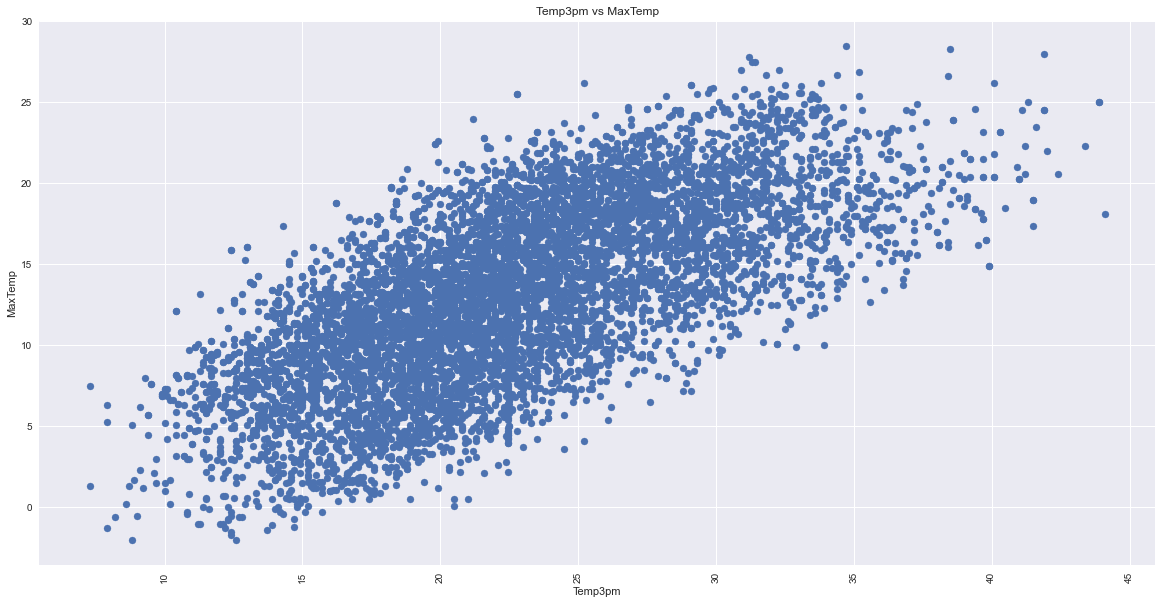

In [97]:
#'Temp3pm and 'MaxTemp', 
plt.figure(figsize = (20,10))
plt.title('Temp3pm vs MaxTemp')
plt.scatter(df['Temp3pm'], df['MaxTemp'])
plt.xticks
plt.xlabel('Temp3pm')
plt.ylabel('MaxTemp')
plt.xticks(rotation = 90)
#max temp at 3 pm is 34 degree celcius as compared to the max temp expected 28 degree celcius degree


(array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

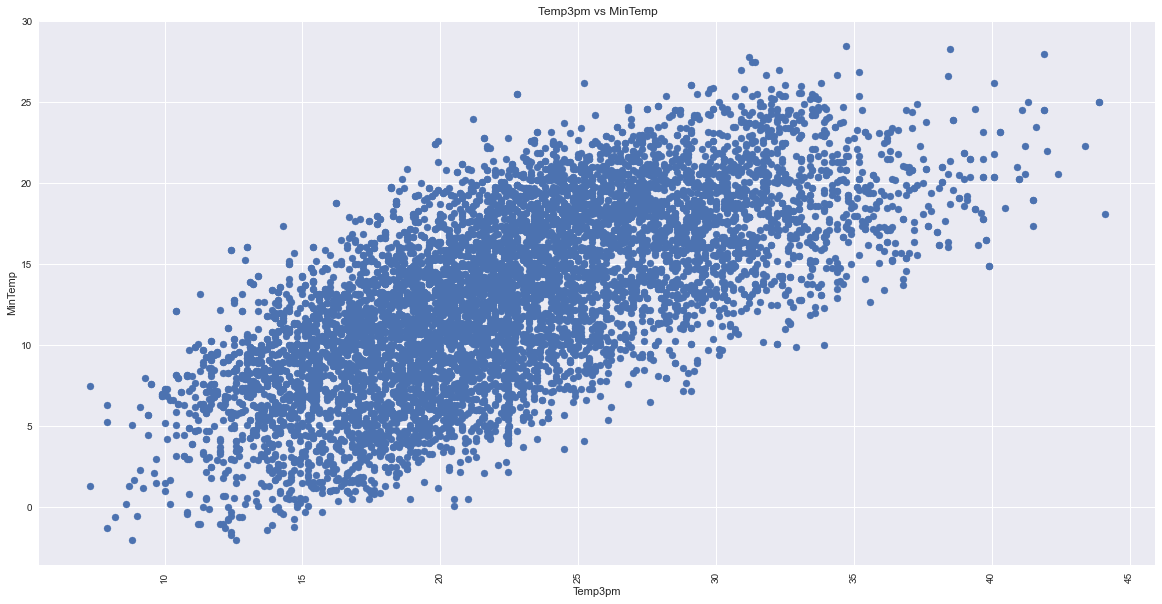

In [98]:
#'Temp3pm and 'MinTemp', 
plt.figure(figsize = (20,10))
plt.title('Temp3pm vs MinTemp')
plt.scatter(df['Temp3pm'], df['MinTemp'])
plt.xticks
plt.xlabel('Temp3pm')
plt.ylabel('MinTemp')
plt.xticks(rotation = 90)
#min temp at 3 pm is 4 degree celcius as compared to the min temp expected 1 degree celcius degree

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

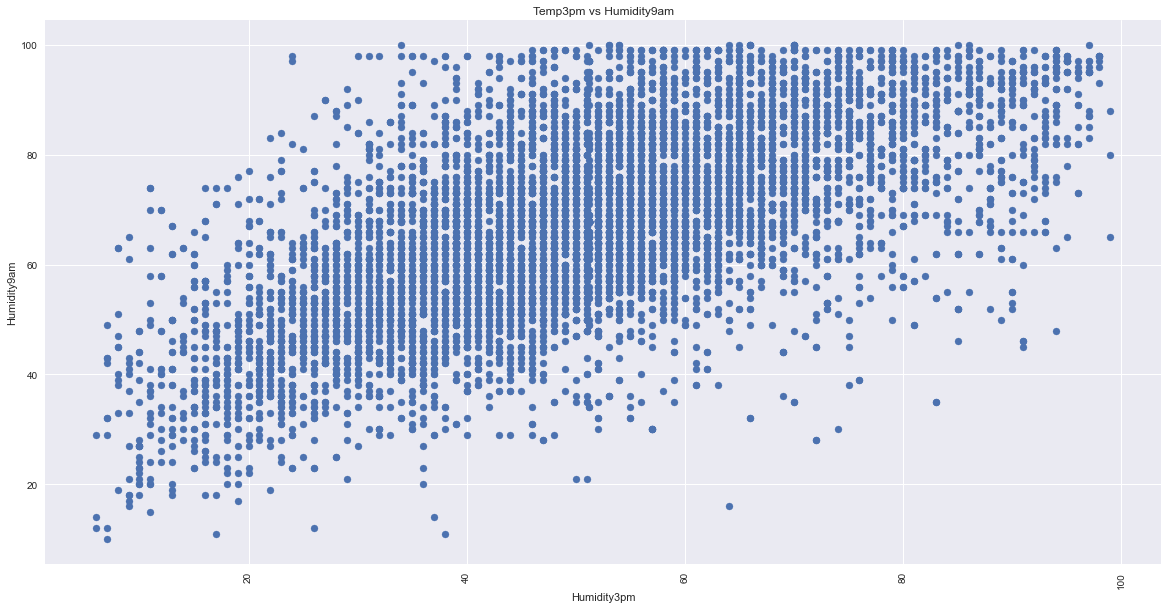

In [99]:
#'Humidity9am', 'Humidity3pm',
plt.figure(figsize = (20,10))
plt.title('Temp3pm vs Humidity9am')
plt.scatter(df['Humidity3pm'], df['Humidity9am'])
plt.xticks
plt.xlabel('Humidity3pm')
plt.ylabel('Humidity9am')
plt.xticks(rotation = 90)
#min temp at 3 pm is 4 degree celcius as compared to the min temp expected 1 degree celcius degree

In [100]:
df.skew().sort_values(ascending=False)

Evaporation      14.023948
Rainfall         13.218403
RainToday         1.242362
RainTomorrow      1.241588
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Temp3pm           0.397331
WindDir9am        0.172792
WindGustDir       0.119640
Humidity3pm       0.118281
Pressure3pm      -0.010214
Temp9am          -0.014748
Pressure9am      -0.024082
Location         -0.050456
MinTemp          -0.089989
MaxTemp          -0.089989
WindDir3pm       -0.119847
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

In [ ]:
#we can see skewness in the dollowing features
#Evaporation      14.023948
#Rainfall         13.218403
#WindDir3pm       -0.119847
#Humidity9am      -0.256743
#Cloud3pm         -0.276294
#Cloud9am         -0.366503
#Sunshine         -0.716525

In [101]:
corr_matrix=df.corr()
corr_matrix["RainTomorrow"].sort_values(ascending=False)
#highest correlation between RainTomorrow and Humidity3pm 

RainTomorrow     1.000000
Humidity3pm      0.444808
Cloud3pm         0.344369
RainToday        0.312929
Cloud9am         0.278943
Humidity9am      0.271222
Rainfall         0.220021
WindGustSpeed    0.190127
MinTemp          0.092942
MaxTemp          0.092942
WindSpeed9am     0.068285
WindSpeed3pm     0.053568
WindGustDir      0.051832
WindDir9am       0.032860
WindDir3pm       0.008918
Location         0.002824
Temp9am         -0.023211
Evaporation     -0.059012
Pressure3pm     -0.135242
Pressure9am     -0.163985
Temp3pm         -0.193805
Sunshine        -0.327731
Name: RainTomorrow, dtype: float64

In [128]:
x = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [129]:
#Let's go ahead and scale the datascaler=StandardScaler()
scaler=StandardScaler()
X=df.drop('RainTomorrow', axis=1)
X_scaled = scaler.fit_transform(x)

In [130]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 6.09516425e-01,  9.41944036e-01,  1.83644966e+00, ...,
        -4.97240252e-01, -1.00221384e-01, -1.80562668e-16],
       [ 2.15141980e-01, -8.78714628e-01,  1.87443659e+00, ...,
        -4.45986353e-02, -2.29975493e-02,  1.15640813e-14],
       [ 1.55269050e+00, -2.41248939e-01,  2.56183422e+00, ...,
        -3.24166101e-01,  1.87838894e-01, -2.23354295e-18],
       ...,
       [-1.08809086e+00, -1.95602730e+00,  8.63440926e-01, ...,
         4.06336303e-01,  7.77375331e-02, -1.01047043e-16],
       [-3.54207428e-01, -2.46346336e+00,  2.34755813e-01, ...,
         1.42054744e-01,  1.92491683e-01, -1.97604097e-17],
       [ 1.66339817e-02,  1.34179344e-01, -6.42396563e-01, ...,
         2.00553646e-02,  2.67986002e-02,  1.01414043e-17]])

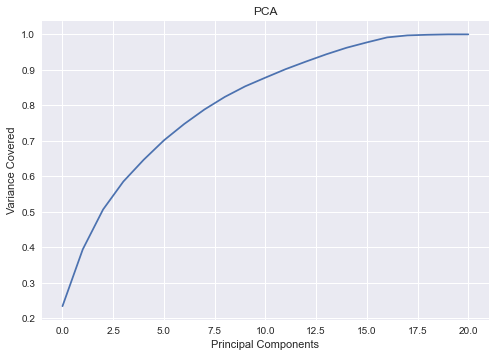

In [131]:
#Let's plot Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [132]:
#17.5 features are important, rest are not

In [133]:
#Around 13 Principal Components are able to explain > 99% variance. Its safe to consider starting 13 PC's
pca=PCA(n_components=18)
new_pcomp=pca.fit_transform(X_scaled)
Princi_comp = pd.DataFrame(new_pcomp, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18' ])
Princi_comp #PC 18 are the features

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.609516,0.941944,1.836450,-2.377997,-1.145690,-0.538838,-0.629603,0.794912,0.228631,0.016056,-0.572705,1.053428,-1.033494,0.242250,-0.853683,-0.378885,-0.661921,0.429922
1,0.215142,-0.878715,1.874437,-2.530823,-1.907850,0.110638,-0.381830,1.042187,-0.892037,-0.036756,-0.092365,0.623385,0.105961,0.258432,0.543017,0.476609,0.456572,-0.429157
2,1.552691,-0.241249,2.561834,-2.840188,-0.581174,-0.432679,-1.110496,0.434897,0.231329,0.146667,0.234365,0.362364,-0.415736,-0.434187,-0.358919,0.532030,0.345815,-0.134550
3,0.185350,-2.196067,-0.782596,-0.383787,-1.276863,0.020311,-1.454723,1.368155,1.226698,-1.554422,-0.716617,0.450787,0.158064,-0.131715,-0.055264,0.261624,-0.191872,-0.224806
4,1.272005,1.124491,-0.843443,-1.216582,-2.172367,-0.377012,-0.335348,0.862951,-0.999387,0.409275,-0.763648,1.501815,0.981412,0.701331,-0.090577,-0.671975,-0.818451,0.480940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,-1.836963,-2.732760,0.266985,1.735987,-0.370997,0.106699,0.324464,0.844948,0.893662,-2.279662,-0.588375,0.091239,-0.482130,0.011569,0.256492,0.083794,0.051248,-0.374297
8421,-1.805224,-2.559133,0.248382,0.596257,-0.157583,-0.201153,0.583616,0.826662,0.446264,-2.300349,-0.651940,0.376517,0.142339,-0.272705,-0.026074,0.079956,-0.494090,-0.412986
8422,-1.088091,-1.956027,0.863441,-0.281845,-0.340505,-0.204680,0.882988,0.813276,-0.849426,-1.768889,-0.112051,-0.633879,-1.363976,0.262177,0.425411,-0.269223,0.056231,-0.552005
8423,-0.354207,-2.463463,0.234756,-0.263511,0.187066,-0.018161,0.468014,0.132446,0.603531,-2.054207,-0.233234,0.336620,0.409922,-1.052902,-0.224547,-0.138658,0.032459,-0.279709


In [134]:
Princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.609516,0.941944,1.836450,-2.377997,-1.145690,-0.538838,-0.629603,0.794912,0.228631,0.016056,-0.572705,1.053428,-1.033494,0.242250,-0.853683,-0.378885,-0.661921,0.429922
1,0.215142,-0.878715,1.874437,-2.530823,-1.907850,0.110638,-0.381830,1.042187,-0.892037,-0.036756,-0.092365,0.623385,0.105961,0.258432,0.543017,0.476609,0.456572,-0.429157
2,1.552691,-0.241249,2.561834,-2.840188,-0.581174,-0.432679,-1.110496,0.434897,0.231329,0.146667,0.234365,0.362364,-0.415736,-0.434187,-0.358919,0.532030,0.345815,-0.134550
3,0.185350,-2.196067,-0.782596,-0.383787,-1.276863,0.020311,-1.454723,1.368155,1.226698,-1.554422,-0.716617,0.450787,0.158064,-0.131715,-0.055264,0.261624,-0.191872,-0.224806
4,1.272005,1.124491,-0.843443,-1.216582,-2.172367,-0.377012,-0.335348,0.862951,-0.999387,0.409275,-0.763648,1.501815,0.981412,0.701331,-0.090577,-0.671975,-0.818451,0.480940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,-1.836963,-2.732760,0.266985,1.735987,-0.370997,0.106699,0.324464,0.844948,0.893662,-2.279662,-0.588375,0.091239,-0.482130,0.011569,0.256492,0.083794,0.051248,-0.374297
8421,-1.805224,-2.559133,0.248382,0.596257,-0.157583,-0.201153,0.583616,0.826662,0.446264,-2.300349,-0.651940,0.376517,0.142339,-0.272705,-0.026074,0.079956,-0.494090,-0.412986
8422,-1.088091,-1.956027,0.863441,-0.281845,-0.340505,-0.204680,0.882988,0.813276,-0.849426,-1.768889,-0.112051,-0.633879,-1.363976,0.262177,0.425411,-0.269223,0.056231,-0.552005
8423,-0.354207,-2.463463,0.234756,-0.263511,0.187066,-0.018161,0.468014,0.132446,0.603531,-2.054207,-0.233234,0.336620,0.409922,-1.052902,-0.224547,-0.138658,0.032459,-0.279709


In [135]:
#using logistic regression
from sklearn.model_selection import train_test_split
LR=LogisticRegression()

In [136]:
#Splitting the dataframe:
for i in range(0,300):
    x_train,x_test,y_train,y_test=train_test_split(Princi_comp,y,random_state=i,test_size=0.25)
    LR.fit(x_train, y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state state",i,"The model performs very well")
        print("At random_state state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random_state state 41 The model performs very well
At random_state state:- 41
Training accuracy_score is:- 83.1
Testing accuracy_score is:- 83.1 


At random_state state 58 The model performs very well
At random_state state:- 58
Training accuracy_score is:- 83.0
Testing accuracy_score is:- 83.0 


At random_state state 65 The model performs very well
At random_state state:- 65
Training accuracy_score is:- 83.0
Testing accuracy_score is:- 83.0 


At random_state state 70 The model performs very well
At random_state state:- 70
Training accuracy_score is:- 82.9
Testing accuracy_score is:- 82.9 


At random_state state 82 The model performs very well
At random_state state:- 82
Training accuracy_score is:- 83.0
Testing accuracy_score is:- 83.0 


At random_state state 87 The model performs very well
At random_state state:- 87
Training accuracy_score is:- 83.1
Testing accuracy_score is:- 83.1 


At random_state state 92 The model performs very well
At random_state state:- 92
Training accu

In [ ]:
lr.fit(x_train, y_train)


In [ ]:
print("Lr classification score",lr.score(x_train,y_train))

In [137]:
# Data split into train and test
x_train, x_test, y_train, y_test = train_test_split(Princi_comp, y, test_size=0.25, random_state=41)

In [140]:
from sklearn.svm import SVC
svc=SVC()
#svc Model training and printing train and test score
svc.fit(x_train,y_train)
#Call the function and pass dataset to check train and test score
print_score(svc, x_train, x_test, y_train, y_test, train=True)
print_score(svc, x_train, x_test, y_train, y_test, train=False)


================Train Result========
Accuracy Score: 87.16%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 84.39%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1613
         1.0       0.78      0.47      0.58       494

    accuracy                           0.84      2107
   macro avg       0.82      0.71      0.74      2107
weighted avg       0.84      0.84      0.83      2107



In [141]:
from sklearn.ensemble import GradientBoostingClassifier  
gbdt=GradientBoostingClassifier()

#gradient boosting Model training and printing train and test score
gbdt.fit(x_train,y_train)

print_score(gbdt, x_train,x_test,y_train,y_test, train=True) 
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 87.67%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 84.15%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      1613
         1.0       0.75      0.49      0.59       494

    accuracy                           0.84      2107
   macro avg       0.80      0.72      0.75      2107
weighted avg       0.83      0.84      0.83      2107



In [142]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()

# Random Forest Model training and printing train and test score
rf.fit(x_train,y_train)

print_score(rf, x_train,x_test,y_train,y_test, train=True)
print_score(rf, x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 99.92%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 88.89%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1613
         1.0       0.86      0.63      0.73       494

    accuracy                           0.89      2107
   macro avg       0.88      0.80      0.83      2107
weighted avg       0.89      0.89      0.88      2107



In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
param_grid = { "C" : [1,5,10,20],
              'gamma':[0.001,0.01,0.02,0.002]
             }

In [146]:
gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [147]:
# best params
gridsearch.best_params_

{'C': 20, 'gamma': 0.02}

In [173]:
# SVC Model training and printing train and test score (post param update)
svc = SVC (C = 18, gamma=0.03)
svc.fit(x_train, y_train)

SVC(C=18, gamma=0.03)

In [174]:
#Call the function and pass dataset to check train and test score
print_score(svc, x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)



================Train Result========
Accuracy Score: 91.23%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 86.28%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.91      1613
         1.0       0.80      0.56      0.66       494

    accuracy                           0.86      2107
   macro avg       0.84      0.76      0.78      2107
weighted avg       0.86      0.86      0.85      2107



In [175]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [178]:
Pipe=Pipeline([('Scaler', StandardScaler()), #fit_transform
               ('PCA', PCA(n_components=18)), #fit_transform
               ('SVM', SVC(C=18, gamma=0.03))])

In [180]:
Pipe.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=18)),
                ('SVM', SVC(C=18, gamma=0.03))])

In [181]:
y_pred=Pipe.predict(x_test)

In [182]:
accuracy_score(y_test,y_pred)

0.8580920740389179

In [ ]:
#GRADIENT BOOST

In [183]:
parm_grid  = {'max_depth' : [3,4],
              'max_leaf_nodes' : [4],
              'learning_rate': [0.1],
              'random_state' : [4,5]}

In [188]:
gridsearch = GridSearchCV(gbdt, param_grid = parm_grid , cv=6)

In [189]:
#fit the model using given paramters
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'max_leaf_nodes': [4], 'random_state': [4, 5]})

In [190]:
gridsearch.best_params_
#printing the best parameters 

{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 4, 'random_state': 4}

In [201]:
gdboost_tuning=GradientBoostingClassifier(learning_rate=0.1, max_depth=3, random_state=4)
#supplying best parameters to our model

In [234]:
gbdt_clf=GradientBoostingClassifier(learning_rate=0.2,max_depth=4,random_state=7)
gbdt_clf.fit(x_train, y_train)
gbdt_pred=gbdt_clf.predict(x_train)
gbdt_clf_report=pd.DataFrame(
    classification_report(y_train, gbdt_pred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, gbdt_pred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, gbdt_pred)} \n")

#***********************Test score******************************************
gbdt_pred=gbdt_clf.predict(x_test)
gbdt_clf_report = pd.DataFrame(
    classification_report(y_test, gbdt_pred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, gbdt_pred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{gbdt_clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, gbdt_pred)}\n")


================Train Result======================
Accuracy Score: 93.53%
____________________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.929517     0.960237  0.935264     0.944877      0.936796
recall        0.990251     0.758183  0.935264     0.874217      0.935264
f1-score      0.958923     0.847331  0.935264     0.903127      0.932482
support    4821.000000  1497.000000  0.935264  6318.000000   6318.000000
____________________________________________________
Confusion Matrix: 
 [[4774   47]
 [ 362 1135]] 


=================Test Result ==========================
Accuracy Score: 86.47%
____________________________________________________
CLASSIFICATION REPORT: 
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.879863    0.791086  0.864737     0.835475      0.859049
recall        0.953503    0.574899  0.864737     0.764201      0.864737
f1-score 

In [221]:
gbdt_pipe=Pipeline([('Scaler', StandardScaler()), #fit_transform
               ('PCA', PCA(n_components=18)), #fit_transform
               ('SVM', GradientBoostingClassifier(learning_rate=0.2,max_depth=4,random_state=7))])

In [222]:
gbdt_pipe.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=13)),
                ('SVM',
                 GradientBoostingClassifier(learning_rate=0.4,
                                            random_state=5))])

In [223]:
gbdt_y_pred=gbdt_pipe.predict(x_test)

In [224]:
accuracy_score(y_test,gbdt_y_pred)

0.8262933080208827

In [226]:
#TUNING WITH RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [227]:
params = {'n_estimators': [47,50,60,70], 'max_leaf_nodes': range(2,4), 'min_samples_split':range(3,10), 'max_depth': range(10,15)}

In [235]:
rfgridsearch = GridSearchCV(rf, param_grid = params , cv=6, n_jobs = -1)
rfgridsearch.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_split': range(3, 10),
                         'n_estimators': [47, 50, 60, 70]})

In [236]:
rfgridsearch.best_estimator_

RandomForestClassifier(max_depth=14, max_leaf_nodes=3, min_samples_split=9,
                       n_estimators=47)

In [246]:
rf_clf=RandomForestClassifier(
    n_estimators=47, max_depth=14, min_samples_split=9)
rf_clf.fit(x_train, y_train)
rfpred=rf_clf.predict(x_train)
rf_clf_report=pd.DataFrame(
    classification_report(y_train, rfpred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, rfpred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, rfpred)} \n")

#***********************Test score******************************************
rfpred=rf_clf.predict(x_test)
clf_report = pd.DataFrame(
    classification_report(y_test, rfpred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, rfpred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, rfpred)}\n")


================Train Result======================
Accuracy Score: 94.33%
____________________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.932545     0.991372  0.943336     0.961958      0.946484
recall        0.997926     0.767535  0.943336     0.882730      0.943336
f1-score      0.964128     0.865211  0.943336     0.914670      0.940691
support    4821.000000  1497.000000  0.943336  6318.000000   6318.000000
____________________________________________________
Confusion Matrix: 
 [[4811   10]
 [ 348 1149]] 


=================Test Result ==========================
Accuracy Score: 86.71%
____________________________________________________
CLASSIFICATION REPORT: 
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.874649    0.826220   0.86711     0.850434      0.863294
recall        0.964662    0.548583   0.86711     0.756623      0.867110
f1-score 

In [247]:
rf_pipe=Pipeline([('Scaler', StandardScaler()), #fit_transform
               ('PCA', PCA(n_components=18)), #fit_transform
               ('rf', RandomForestClassifier(n_estimators=47, max_depth=14, min_samples_split=9))])

In [248]:
rf_pipe.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=18)),
                ('rf',
                 RandomForestClassifier(max_depth=14, min_samples_split=9,
                                        n_estimators=47))])

In [249]:
rf_ypred=rf_pipe.predict(x_test)

In [250]:
accuracy_score(y_test,rf_ypred)

0.8599905078310394

In [ ]:
#Random forest is the best method for predicting weather. It will not rain tommorow

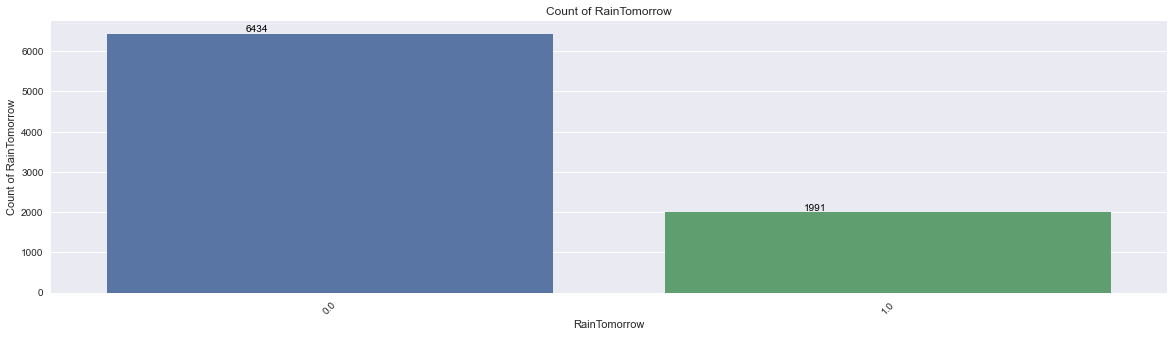

In [251]:
#count of rain tommorow
plt.figure(figsize = (20,5))
plt.title('Count of RainTomorrow')
ax=sns.countplot(x = 'RainTomorrow', data=df)
plt.xlabel('RainTomorrow')
plt.ylabel('Count of RainTomorrow')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [252]:
rf_tuning=rf.fit(x_train,y_train)

In [253]:
import pickle as pkl
WeatherForecast_Model= 'Income_Forecast.pickle'
pkl.dump(rf_tuning, open(WeatherForecast_Model,'wb'))